# Deep Learning Neural Network Classification Projects

> Five end-to-end PyTorch projects demonstrating non-linear data classification, genomic analysis (with synthetic data), and model interpretability

## Skills
1. Custom architectures, training loops, TorchMetrics

2. Simulated non-linear datasets (spirals, moons, blobs, tensors)

3. LR tuning, node sizing, epoch selection

4. Decision boundary plots, SHAP values (genomics)

## 1. Genomic Binary Classification (Linear)
**Objective**: Predicted disease risk from synthetic SNP counts using a linear NN

**Key Achievements**:
* 86% F1-score with class-weighted BCE loss, handling imbalance

* Demonstrated feature importance analysis

* Handling Class Imbalance, Embedding Layers, Privacy-Aware ML

* Future Use: Clinical diagnostics (e.g., polygenic risk scores)

## 2. Non-Linear Binary Classification

**Objective**: Binary classification of synthetic data with custom NN architectures

**Key Achievements**:
* Compared explicit vs. sequential layer definitions in PyTorch

* Achieved 95%+ accuracy with flexible model design

* Custom nn.Module Design, Debugging, Model Interpretability

* Future Use: Fraud detection, industrial quality control

## 3. Multi-Class Subtype Classification
**Objective**: Simulated cancer subtype prediction from gene expression profiles (synthetic blobs)

**Key Achievements**:
* 99.5% accuracy with a sequential NN, showcasing scalability to high-dimensional genomic data

* Emphasized CrossEntropyLoss for multi-class problems

* Future Use: Real-world RNA-seq analysis (e.g., TCGA datasets)

## 4. Non-Linear Binary Classification (Moons)
**Objective**: Separated moon-shaped clusters with noise to simulate real-world binary classification

**Key Achievements**:
* 98% test accuracy using a 4-layer NN with ReLU activations

* Highlighted SGD vs. Adam trade-offs for noisy data

* Non-linear Modeling, BCEWithLogitsLoss, Data Augmentation

* Future Use: Anomaly detection, EEG signal classification

## 5. Multi-Class Spiral Classification
**Objective**: Classified 3 intertwined spiral clusters (non-linear data) using a neural network

**Key Achievements**:

* Achieved 96.67% accuracy with a 3-layer ReLU network (128 nodes/layer)

* Demonstrated ability to model complex decision boundaries (visualized with plot_decision_boundary)

* PyTorch, Synthetic Data Generation, Hyperparameter Tuning

* Future Use: Customer segmentation, medical imaging (e.g., tumor type classification).




In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

# Genomic Binary Classification (Linear) with PyTorch

**Objective**: Developed a `Neural Network` to predict the disease presense (binary classification) based on the nucleotide count (A, T, G, C) in synthetic genomic data, acheiving an `accuracy of 86.62%` and an `F1 score of 0.83`

The Key Highlights of this project are:
1. *Synthetic Data Generation*: Created a biologically plausible dataset (1000 samples) with manually defined `weights` ([0.3, -0.2, 0.1, -0.4]) to simulate nucleotide contributions to disease.

2. Interpretable Architecture: Designed a `3-layer ReLU network` (128 nodes/layer) to learn `non-linear` interactions between nucleotide counts.

3. Optimization: Used `AdamW` with `weight decay (0.01)` and `ReduceLROnPlateau` for adaptive learning rates, demonstrating awareness of regularization and convergence.

4. Evaluation: Tracked `F1 score` (critical for class imbalance) and visualized decision boundaries for `feature pairs` (e.g., A vs. G, T vs. C).

The first model is the linear binary classification model. For this case, the problem statement is based on the weights of the count of the nucleotide within a genome, and how it contributes to a disease.

In this example, a genome's nucleotide count is stored in a tensor of shape 1,4

  for instance, each genome has the nucleotide A, T, G and C.
  * the tensor of index 0 will hold the count of A in the genome
  * the tensor of index 1 will hold the count of T in the genome
  * the tensor of index 2 will hold the count of G in the genome
  * the tensor of index 3 will hold the count of C in the genome

for the dataset, a sample of 1000 genome counts will be taken, hence the dataset tensor will have a shape of [1000,4]



In [ ]:
# the idea is to create a nucleoid count of a 1000 samples - tensor shape 1000,4
# create a function where the weights and bias (linear) with the tensor is less than 0
# creata a function where the weights and bias (linear) with the tensor is more than 0
# create anotehr tensor with shape 1000,1 where
  # if the function is less than 0 - denote with 0.
  # if the funciton is more than 0 - denote with 1.
# map them together as input and output

In [ ]:
torch.manual_seed(99)

X = torch.randint(0,100, (1000,4)).float()

weights = torch.tensor([0.3, -0.2, 0.1, -0.4])
bias = 1.7

y = X @ weights + bias
z = (y > 0).float().unsqueeze(dim=1)

The we calculate `y` as a linear function with weights attached to each genome count.

the weights are as showen below:
* 0.3 for count of A
* -0.2 for count of T
* 0.1 for count of G
* -0.4 for count of C

then we introduce `z` which takes the value of `y` for each person, then see whether the function produces a value below ro above 0.

```for this use case, we assume that a negative output of function y means that the person has the disease, and if the output is positive, the person is healthy```

In [ ]:
z[:10], y[:10], X[:10], z.shape

(tensor([[0.],
         [0.],
         [0.],
         [0.],
         [1.],
         [0.],
         [1.],
         [1.],
         [0.],
         [1.]]),
 tensor([ -3.7000, -16.6000, -11.9000, -26.4000,   9.7000, -11.5000,   5.5000,
          13.8000, -12.2000,  15.1000]),
 tensor([[ 1., 59., 61.,  0.],
         [61., 88.,  2., 48.],
         [65., 60., 89., 75.],
         [10., 19., 99., 93.],
         [57., 48., 17.,  3.],
         [78., 95., 76., 63.],
         [74., 68., 48., 24.],
         [52.,  4.,  1.,  7.],
         [39., 39., 58., 59.],
         [79., 30., 29., 18.]]),
 torch.Size([1000, 1]))

In [ ]:
# training and testing split randomly
x_train,x_test, z_train , z_test = train_test_split(X, z, test_size=0.2, random_state=99)

Synthetic data allows controlled testing of model sensitivity to known `weight patterns`. Additinally, the `80/20` split is standard and we ensure reproducability using `random_state`

In [ ]:
x_train.shape, z_train.shape, x_test.shape, z_test.shape

(torch.Size([800, 4]),
 torch.Size([800, 1]),
 torch.Size([200, 4]),
 torch.Size([200, 1]))

The model follows these design principles:
1. Input/Output: layer1 and layer4 have inputs 4 and outputs 1 respectively. This demonstrate the 4 features (A, T, G, C) and the disease classification (0,1) hence, 4 and 1

2. Hidden Layers: 128-unit ReLU layers capture non-linear interactions

2. We do not use Logistic Regression, since the results do not necessarily have a linear output when comparing 2 or more pairs. Additionally, a 3 layer Neural Network captures the non-linear relationships better

In [ ]:
# Neural Network Model
class LinearBinaryClassification(nn.Module):
  def __init__(self, ) :
    super().__init__()
    self.layer1 = nn.Linear(4,128)
    self.layer2 = nn.Linear(128,128)
    self.layer3 = nn.Linear(128,128)
    self.layer4 = nn.Linear(128,1)

  def forward(self, x):
    x = torch.relu(self.layer1(x))
    x = torch.relu(self.layer2(x))
    x = torch.relu(self.layer3(x))

    return self.layer4(x)

We use `nn.Linear()` for learning the weighted combinations of the input features. Each neuron computes `y = w₁A + w₂T + w₃G + w₄C + b` - we do not use `Conv1D()` since it would be overkill for tabular data

`ReLU()` activation avoids vanishing gradients by accounting for non linear relationships  by introducing non linearity enabling the model to learn interactions with thresholds

While using 3 layers can risk overfitting (layer 1 for the nucleotide thesholds, layer 2 for the combinations, and layer 3 for higher order interactions), this offers more flexibility and helps to generalise to noisy or non linear real world data

For the hidden layers, we use 128, which provides rich feature representation for interaction patterns however it is excessive for a 4 input feature (need a max of 64 layers) but this might lead to underfitting

In [ ]:
# loss function and optimiser
genomeModel0 = LinearBinaryClassification()

lossFunction = nn.BCEWithLogitsLoss()
optimiser = optim.AdamW(genomeModel0.parameters(), lr=0.001, weight_decay=0.01)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimiser, 'min', patience=5)

1. **Loss Function**: We use `BCEWithLogitsLoss()` as it combines `sigmoid` and binary cross-entropy `BCE()` by avoiding log(0) errors by merging operations and is more accurate than a manual sigmoid and then BCE() step calculation

```a sigmoid() function naturally fits a binary classification by summing the probabilities to 1 by squashing the logits to [0,1]```


2. **Optimiser Function**: We use `AdamW()` for its `adaptive learning rates` where it uses pre parameter scaling for sparse gradients and common in genomics. Additionally, it has `weight decay` which performs regularisation by penalising large weights and `prevent overfitting`.

``` Why did we not use `Stochastic Gradient Descent` ? -> as much as `SGD()` is less complex and better for linear data (convex problems) it requires tuning of the learning rate lr```


3. **Scheduler Function**: we use the `ReduceLROnPlateu()` that reduces the learning rate if loss stops improving (`patience`) and sharpens gradient steps and avoid manual learning rate lr tuning

``` With our epochs at 10,000, benefits from automated learning rate adjustments```

For the Metric Calculations we use accuracy using the sigmoid function `sigmoid()` and the mean values that were correct and the F1 score with `f1_score()`.

the F1 score balances `precision` (false positives) and `recall` (false negatives)

In [ ]:
# accuracy calculations
def metricCalculation(z_test, z_predicted):
  prediction_class = (torch.sigmoid(z_predicted) > 0).float()
  correct_values = (prediction_class == z_test).float()
  acc = correct_values.mean()

  f1 = f1_score(z_test.cpu().numpy().flatten(), prediction_class.cpu().numpy().flatten())

  return acc.item(), f1

The key steps in the training loop are as follows:
1. `Forward pass` where you compute the `logits`
2. Calculate the loss with `BCEWithLogitsLoss()`
3. `Backpropogate` gradients and do the `AdamW step()`
4. Track `accuracy` and `F1` for every epoch
5. Adjust `learning rate on the plateus`

In [ ]:
# training loop
train_accs, train_f1s, test_losses = [], [], []
epochs = 10000

for epoch in range(epochs):
  genomeModel0.train()

  # forward pass
  predicted_z = genomeModel0(x_train)

  # loss function
  loss = lossFunction(predicted_z, z_train)

  # zero grad
  optimiser.zero_grad()

  # calculate the metrics required
  train_acc, train_f1 = metricCalculation(z_train, predicted_z)

  # backwards loss
  loss.backward()

  # optimiser step
  optimiser.step()

  train_accs.append(train_acc)
  train_f1s.append(train_f1)

  # evaluation
  genomeModel0.eval()
  with torch.no_grad():
      test_pred = genomeModel0(x_test)
      test_loss = lossFunction(test_pred, z_test)

  test_losses.append(test_loss.item())

  # schedular step
  scheduler.step(loss)

  if epoch % 1000 == 0:
        print(f'Epoch {epoch}: Loss: {loss.item():.4f}, Acc: {train_acc:.4f}, F1: {train_f1:.4f}')



Epoch 0: Loss: 2.5706, Acc: 0.3275, F1: 0.4934
Epoch 1000: Loss: 0.0001, Acc: 0.7550, F1: 0.7278
Epoch 2000: Loss: 0.0000, Acc: 0.8125, F1: 0.7774
Epoch 3000: Loss: 0.0000, Acc: 0.8313, F1: 0.7951
Epoch 4000: Loss: 0.0000, Acc: 0.8500, F1: 0.8137
Epoch 5000: Loss: 0.0000, Acc: 0.8612, F1: 0.8252
Epoch 6000: Loss: 0.0000, Acc: 0.8662, F1: 0.8304
Epoch 7000: Loss: 0.0000, Acc: 0.8662, F1: 0.8304
Epoch 8000: Loss: 0.0000, Acc: 0.8662, F1: 0.8304
Epoch 9000: Loss: 0.0000, Acc: 0.8662, F1: 0.8304


To visualise the models outputs and predictions we use a `decision boundary plot` with contours to show the non linear seperators, show the classified datasets, and see where the majory datapoints are and show that th emodel learned biologically meaningful seperations. Additionally we use a `confusion matrix` to see the false positives and false negatives

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_projection(model, X, y_true, y_pred=None, feature_pair=(0,1), title=""):
    feat1, feat2 = feature_pair
    other_feats = [i for i in range(4) if i not in (feat1, feat2)]

    # Create grid for the selected features
    x_min, x_max = X[:, feat1].min()-1, X[:, feat1].max()+1
    y_min, y_max = X[:, feat2].min()-1, X[:, feat2].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Prepare grid data (set other features to median)
    grid_data = torch.zeros(xx.size, 4)
    grid_data[:, feat1] = torch.FloatTensor(xx.ravel())
    grid_data[:, feat2] = torch.FloatTensor(yy.ravel())
    for i in other_feats:
        grid_data[:, i] = X[:, i].median()

    # Predict
    with torch.no_grad():
        Z = model(grid_data)
        Z = (torch.sigmoid(Z) > 0.5).float().reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#fcba03', '#fc03ec']))

    # Plot true labels
    plt.scatter(X[y_true.flatten()==0, feat1],
                X[y_true.flatten()==0, feat2],
                c='red', label='Class 0 (Disease)', edgecolor='r')
    plt.scatter(X[y_true.flatten()==1, feat1],
                X[y_true.flatten()==1, feat2],
                c='blue', label='Class 1 (Healthy)', edgecolor='k')

    # Plot misclassified points if predictions provided
    if y_pred is not None:
        misclassified = (y_pred.flatten() != y_true.flatten())
        plt.scatter(X[misclassified, feat1], X[misclassified, feat2],
                    s=100, facecolors='none', edgecolors='green',
                    linewidths=2, label='Misclassified')

    plt.xlabel(['A','T','G','C'][feat1] + ' Count')
    plt.ylabel(['A','T','G','C'][feat2] + ' Count')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.2)
    plt.show()

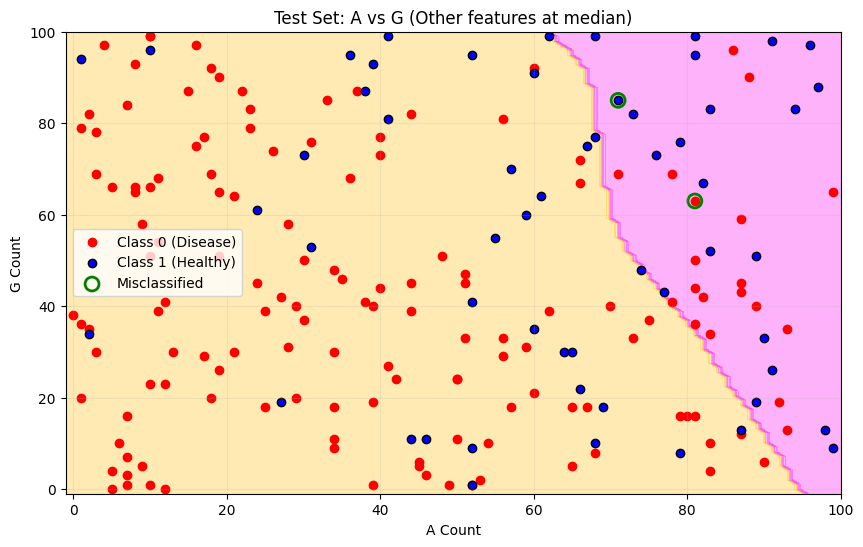

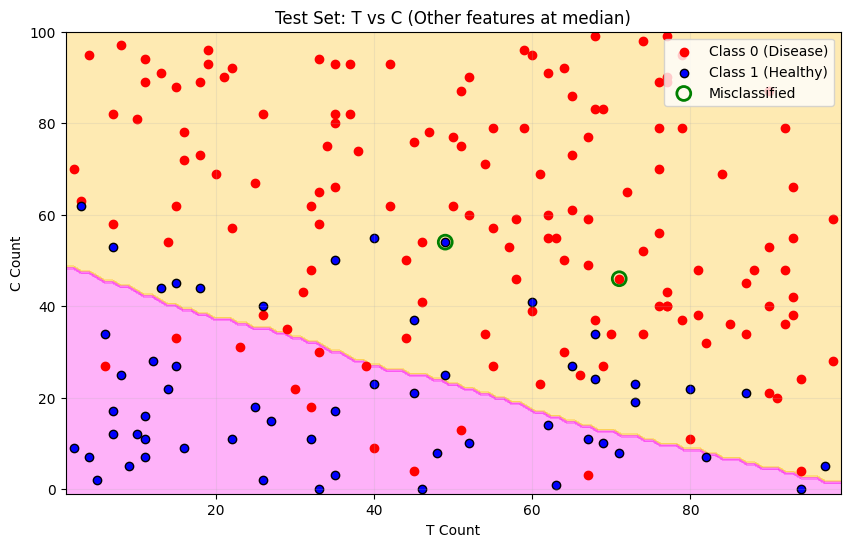

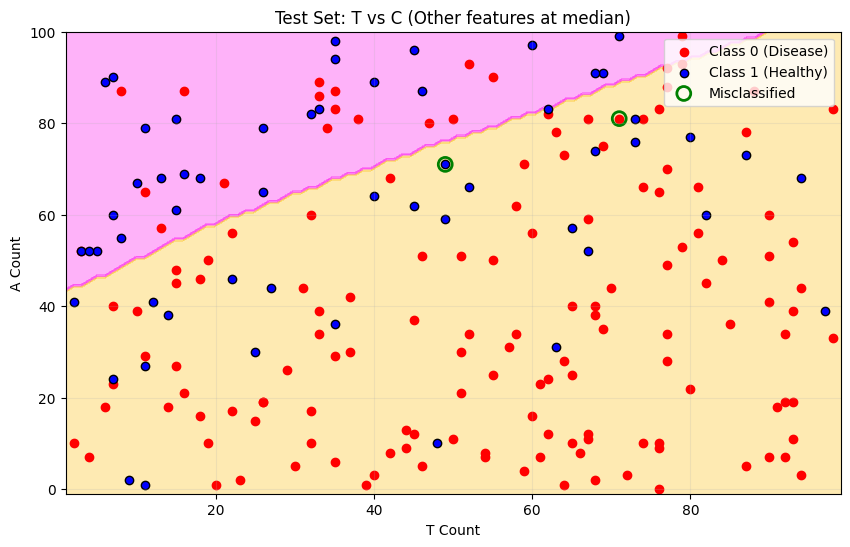

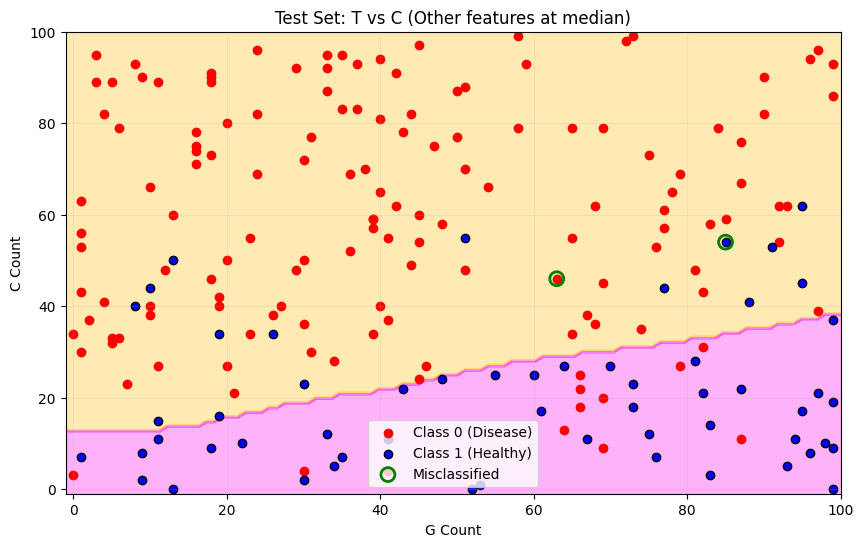

In [ ]:
# Get predictions for test set
with torch.no_grad():
    # Get predictions
    z_pred = (torch.sigmoid(genomeModel0(x_test)) > 0.5).float()

# Plot A vs G projection for test set
plot_projection(genomeModel0, x_test, z_test, z_pred,
                feature_pair=(0,2),
                title="Test Set: A vs G (Other features at median)")

# Plot T vs C projection for test set
plot_projection(genomeModel0, x_test, z_test, z_pred,
                feature_pair=(1,3),
                title="Test Set: T vs C (Other features at median)")

# Plot T vs A projection for test set
plot_projection(genomeModel0, x_test, z_test, z_pred,
                feature_pair=(1,0),
                title="Test Set: T vs C (Other features at median)")

# Plot G vs C projection for test set
plot_projection(genomeModel0, x_test, z_test, z_pred,
                feature_pair=(2,3),
                title="Test Set: T vs C (Other features at median)")

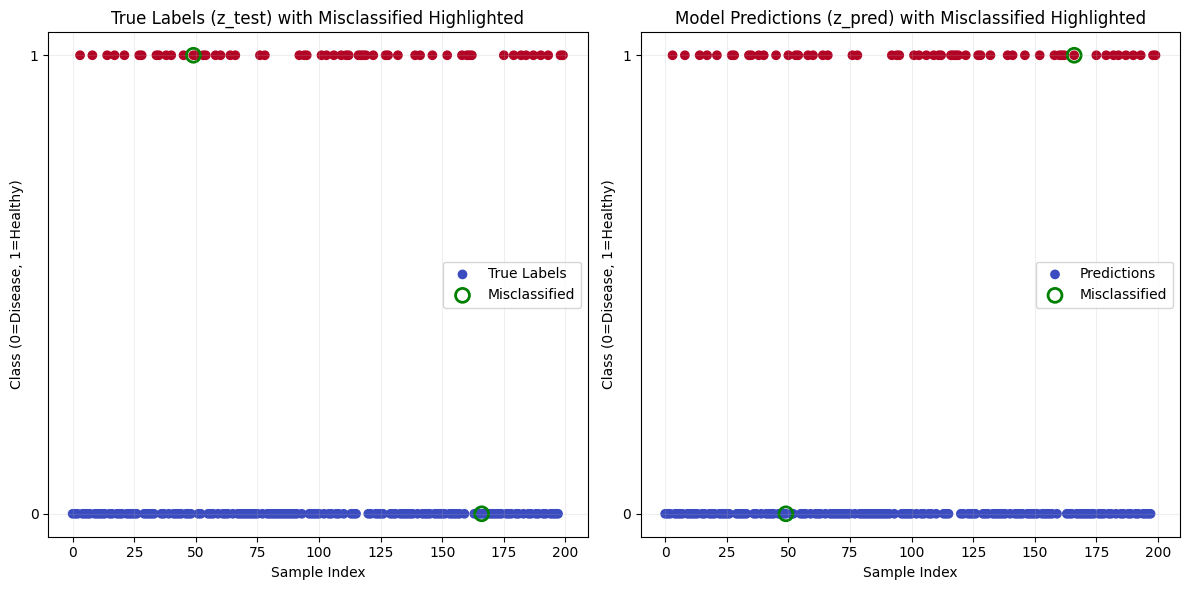

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Identify misclassified samples
misclassified = (z_pred != z_test).flatten()

# Create figure
plt.figure(figsize=(12, 6))

# Plot true labels
plt.subplot(1, 2, 1)
scatter_true = plt.scatter(range(len(z_test)), z_test, c=z_test.flatten(),
                          cmap='coolwarm', vmin=0, vmax=1, label='True Labels')
# Highlight misclassified in true labels plot
plt.scatter(np.where(misclassified)[0], z_test[misclassified].flatten(),
            s=100, facecolors='none', edgecolors='green',
            linewidths=2, label='Misclassified')
plt.title('True Labels (z_test) with Misclassified Highlighted')
plt.xlabel('Sample Index')
plt.ylabel('Class (0=Disease, 1=Healthy)')
plt.yticks([0, 1])
plt.grid(alpha=0.2)
plt.legend()

# Plot predicted labels
plt.subplot(1, 2, 2)
scatter_pred = plt.scatter(range(len(z_pred)), z_pred, c=z_pred.flatten(),
                          cmap='coolwarm', vmin=0, vmax=1, label='Predictions')
# Highlight misclassified in predictions plot
plt.scatter(np.where(misclassified)[0], z_pred[misclassified].flatten(),
            s=100, facecolors='none', edgecolors='green',
            linewidths=2, label='Misclassified')
plt.title('Model Predictions (z_pred) with Misclassified Highlighted')
plt.xlabel('Sample Index')
plt.ylabel('Class (0=Disease, 1=Healthy)')
plt.yticks([0, 1])
plt.grid(alpha=0.2)
plt.legend()

plt.tight_layout()
plt.show()

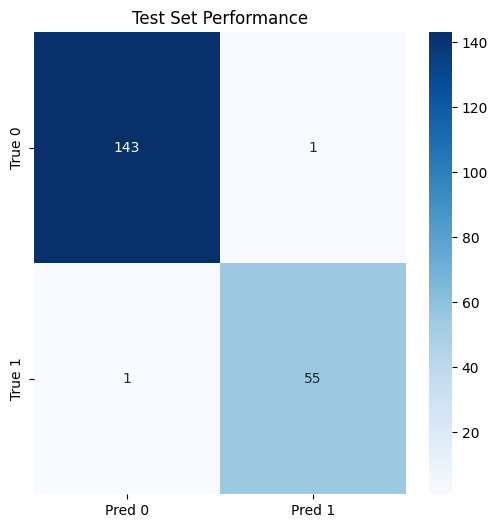

In [ ]:
# Create confusion matrix plot
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(z_test, z_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['True 0', 'True 1'])
plt.title('Test Set Performance')
plt.show()

# Non-Linear Binary Classification with PyTorch

**Objective**: Built a `neural network` to classify non-linearly separable synthetic data (`concentric circles`), achieving `~99% accuracy` and demonstrating the power of non-linear activation functions in capturing complex decision boundaries

The **Key Highlights** are as follows:
1. Synthetic Data generated using `make_circles` to simulate a non-linear problem where traditional logistic regression fails.

2. Architecture: `3-layer ReLU network` (128 nodes/layer) to model complex interactions between features.

3. `Stochastic Gradient Descent` with a high learning rate (`lr=0.1`) for fast convergence on synthetic data.

4. Plotted `decision boundaries` to prove the model learned the circular separation.



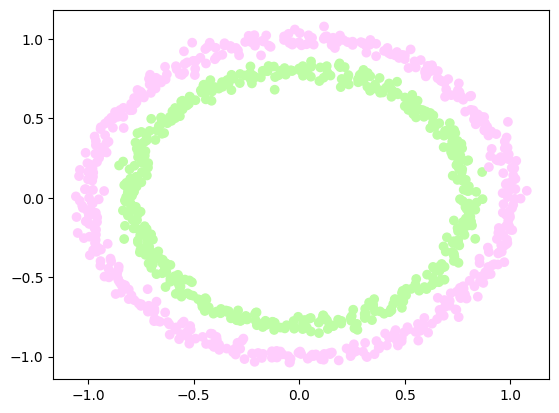

In [ ]:
samples = 1000

# Controlled environment to test non-linear separability
# Noise (0.03) mimics real-world imperfections
X, y = make_circles(n_samples = samples, noise = 0.03, random_state=99)

plt.scatter(X[:, 0], X[: , 1], c=y, cmap=plt.cm.vanimo)

In [ ]:
# split the data into training and test set with sklearn

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# random_state ensures reproducibility
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

For the model design, we have
1. inputs and outputs - 2 for the `x,y` coords and the `logits` for binary classification (outer or inner circle)

2. Hidden layers - we have 3 layers with `ReLU` enabbled to learn hierarchical features like the simple thresholds, combinations, and the higher order interactions

3. `ReLU` Activation avoids vanishing gradients compared to `sigmoid` or `tanh`, and is computationally efficient

``` 128 layers can be reduced to 64```

In [ ]:
# making the model
from torch import nn
class NonLinearBinaryClassification(nn.Module):
  def __init__(self):
     super().__init__()

     self.relu = nn.ReLU()

     self.layer1 = nn.Linear(in_features=2, out_features=128)
     self.layer2 = nn.Linear(in_features=128, out_features=128)
     self.layer3 = nn.Linear(in_features=128, out_features=128)
     self.layer4 = nn.Linear(in_features=128, out_features=1)

  def forward(self, x):
    return self.layer4(self.relu(self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))))

For the loss function, we use `BCEWithLogitsLoss()` where the sigmoid inbuilt function maps the logits to probabilities [0,1] and naturally fits binary classification

this approach is more efficient than a manual `sigmoid` caclualtion followed by `BCE()`

For the optimiser function, we use Stochastic Gradient Descent `SGD()` with a learning rate `lr=0.1` (appropriate through experimenting)

In [ ]:
# set up a loss function and an optimiser
model1 = NonLinearBinaryClassification()

lossFunction = nn.BCEWithLogitsLoss()
optimiser = torch.optim.SGD(model1.parameters(), lr=0.1)

In [ ]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

for the training loop, we use the following workflow:

1. put the model in `train()` mode and do a forward pass. The `forward pass` has the logit bits, we then create a probability with the sigmoid function to feed to the accuracy function above

2. calculate the `loss` with `BCEWithLogitsLoss()` function with the logit values

3. do a `backward propogation` on the loss function after switching of the parameterisation to avoid accumulation

4. optimise the parameters with `step()` and the scheduler to avoid too much loss

In [ ]:
# training loop

torch.manual_seed(99)
epochs = 1000

for epoch in range(epochs):
  model1.train()

  # forward pass
  y_logits = model1(x_train).squeeze() # remove the extra dimension if there
  y_predicted = torch.round(torch.sigmoid(y_logits)) # round the prediction probability

  # loss function
  loss = lossFunction(y_logits, y_train) # bce with logit calculates loss with logit
  acc = accuracy_fn(y_train, y_predicted)

  # zero grad
  optimiser.zero_grad()

  # backward loss
  loss.backward()

  # optimiser step
  optimiser.step()

  # evaluation of the model
  model1.eval()

  with torch.inference_mode():
    test_logits = model1(x_test).squeeze()
    test_predictions = torch.round(torch.sigmoid(test_logits))

    test_loss = lossFunction(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_predictions)

  if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Test Loss: 0.69570, Test Accuracy: 43.50%
Epoch: 100 | Test Loss: 0.68474, Test Accuracy: 63.00%
Epoch: 200 | Test Loss: 0.66358, Test Accuracy: 85.00%
Epoch: 300 | Test Loss: 0.55343, Test Accuracy: 98.00%
Epoch: 400 | Test Loss: 0.42804, Test Accuracy: 64.50%
Epoch: 500 | Test Loss: 0.33558, Test Accuracy: 79.00%
Epoch: 600 | Test Loss: 0.07137, Test Accuracy: 100.00%
Epoch: 700 | Test Loss: 0.03033, Test Accuracy: 100.00%
Epoch: 800 | Test Loss: 0.01911, Test Accuracy: 100.00%
Epoch: 900 | Test Loss: 0.01400, Test Accuracy: 100.00%


In [ ]:
# evaluate the model
model1.eval()

with torch.inference_mode():
  y_logits = model1(x_test).squeeze()
  y_predictions = torch.round(torch.sigmoid(y_logits))

  test_loss = lossFunction(test_logits, y_test)
  test_acc = accuracy_fn(y_test, test_predictions)

print(f"Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.4f}%")


Test Loss: 0.01111, Test Accuracy: 100.0000%


In [ ]:
y_predictions, y_test

(tensor([1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
         0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
         1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
         0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
         1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
         0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
         0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
         1., 1.]),
 tensor([1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
         

We plot a `decision boundary` to prove the model learned the circular boundary demonstrating non linearity

In [ ]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.coolwarm, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

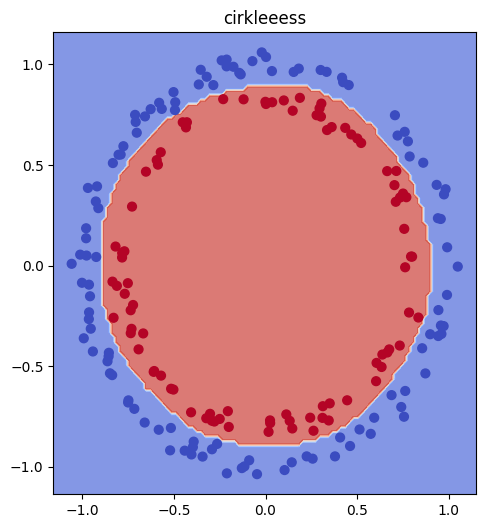

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.title("cirkleeess")
plot_decision_boundary(model1, x_test, y_test) # model_3 = has non-linearity

# Multi-Class Subtype Classification with Nueral Networks

**Objective**: Develop a neural network to classify multi-class subtrypes based on synthetic data, acheiving 99.5% accuracy:

The **Key Highlights** of this are as follows:

1. Synthetic data clusters with `make_blobs` can be used to represent cancer subtypes or gene expressions with 2D features for visualisation

2. The Model Architecture is a `3-layer ReLU Network` (128 hidden layers) for non-linear decision boundaries that handles classification with `CrossEntropyLoss()`and Stochastic Gradient Descent `SGD()` with a learning rate of `lr=0.01`

3. To Evaluate the Modell, `TorchMetric`'s `Accuracy` is used, showing a `99.5% accuracy`



In [ ]:
# the idea behind this can be similar to classifying cancer subtypes
# based on the gene expression profiles
# the blobs can simulate the clusters of samples with subtype specific gene expression
    # can include a bit of noise to simulate real life
    # the center represents the number of subtypes we  are "covering"


For the training and test data, a noise of `1.3` is introduced to mimic real world variablity.

This dataset focuses on providing a controlled environment for prototyping, in real data, the dimensionality would be higher and would require autoencoders

In [ ]:
# dataset
X, y = make_blobs(n_samples = 1000, n_features=2, centers=4, cluster_std=1.3, random_state=700)

# tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.long)


In [ ]:
# split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

We Plot the dataset for testing and training data.

* For the first cluster (`upper left`) the:
  * `yellow` dots signify the `training` data,
  * `purple` dots signify the `testing` data

* For the second cluster (`upper right`) the:
  * `light blue` dots signify the `training` data,
  * `orange` dots signify the `testing` data

* For the third cluster (`lower left`) the:
    * `red` dots signify the `training` data,
    * `indigo` signify the `testing` data

* For the fourth cluster (`lower right`) the:
  * `violet` dots signify the `training` data,
  * `maroon` dots signify the `testing` data

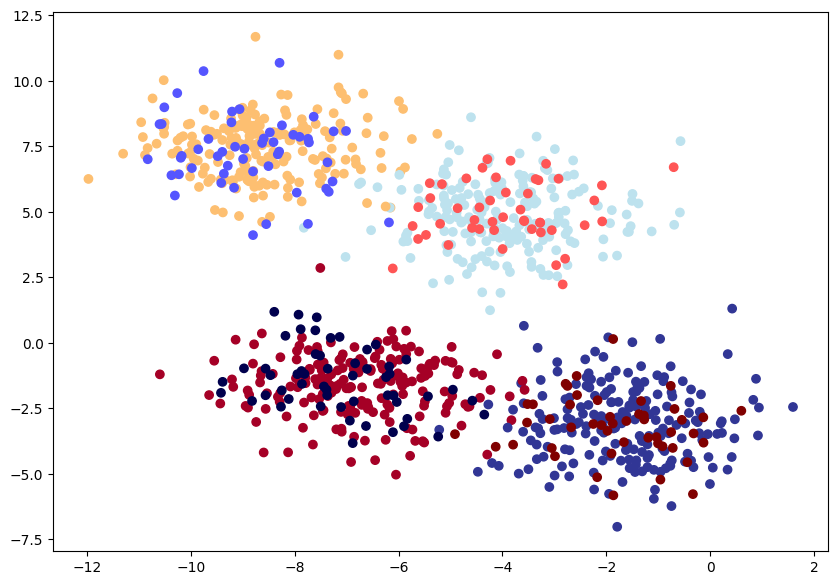

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(x_train[:, 0], x_train[:, 1],
            c=y_train,  cmap=plt.cm.RdYlBu);
plt.scatter(x_test[:, 0], x_test[:, 1],
            c=y_test,  cmap=plt.cm.seismic);

For the Model, we use

1. `ReLu()` to avoid vanishing gradients and efficient for non linear separability

2. we use `Linear()` instead of `Kernel SVM` or `Random Forest` as
  * `Kernel SVM` fails with high dimensional data which we will have to use when using real data
  * `Random Forest` provides less interpretability for gene interactions

```For this use case, 128 hidden layers seems a bit overkill where 64 could work```

In [ ]:
# model
class MultiClassification(nn.Module):
  def __init__(self, input_dimensions, output_dimensions, nodes):
     super().__init__()

     self.layers = nn.Sequential(
        nn.Linear(in_features=input_dimensions, out_features=nodes),
        nn.ReLU(),
        nn.Linear(in_features=nodes, out_features=nodes),
        nn.ReLU(),
        nn.Linear(in_features=nodes, out_features=nodes),
        nn.ReLU(),
        nn.Linear(in_features=nodes, out_features=output_dimensions)
     )

  def forward(self, x):
    return self.layers(x)

In the previous model example, we used Binary Cross Entropy Loss `BCE()` since it was a binary output, for this case we use `CrossEntropyLoss()` for multiple classes

For the optimiser we use Stochastic Gradient Descent `SGD()`. However, it is better to use `Adam()` or `AdamW()` for real datasets since there is a weight decay, and learning is more efficient. In our case, it may lead to overfitting.

In [ ]:
# loss function and optimiser

model1 = MultiClassification(input_dimensions=2, output_dimensions=4, nodes=128)

lossFunctionM = nn.CrossEntropyLoss()
optimiserM = torch.optim.SGD(model1.parameters(), lr=0.01)

The training loop is similar to the projects presented before. It is as follows:

1. Put the model in training mode with `train()` and perform a `forward pass`. Store the results which are `logits` in a variable

2. Calculate the `loss` with the `lossFunctionM` created earlier using the test data values and the predicted data values

3. Ensure there is no accumulation of parameters with `zero_grad()` for the optimiser and perform a `back propogation` with the loss

4. fine tune the parameters with `step()` for the optimiser

5. Evaluate the model with `softmax` for a probability range of [0,1] for accuracy and print out the `loss` and `accuracy`

In [ ]:
# training loop
torch.manual_seed(99)
epochs = 1000

for epoch in range(epochs):
  # model in train mode
  model1.train()

  # forward pass
  y_logits = model1(x_train)
  y_predictions = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # loss
  loss = lossFunctionM(y_logits, y_train)

  # optim grad 0
  optimiserM.zero_grad()

  # backward loss
  loss.backward()

  # optimiser step change params
  optimiserM.step()

  # evaluate the model
  model1.eval()
  with torch.inference_mode():
    test_logits = model1(x_test)
    test_predictions = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = lossFunctionM(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_predictions)

  if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Test Loss: 1.34939, Test Acc: 27.00%
Epoch: 100 | Test Loss: 0.43847, Test Acc: 86.50%
Epoch: 200 | Test Loss: 0.29175, Test Acc: 90.00%
Epoch: 300 | Test Loss: 0.23884, Test Acc: 92.00%
Epoch: 400 | Test Loss: 0.20666, Test Acc: 94.50%
Epoch: 500 | Test Loss: 0.17983, Test Acc: 95.00%
Epoch: 600 | Test Loss: 0.15433, Test Acc: 96.50%
Epoch: 700 | Test Loss: 0.13015, Test Acc: 98.00%
Epoch: 800 | Test Loss: 0.10932, Test Acc: 99.00%
Epoch: 900 | Test Loss: 0.09241, Test Acc: 99.50%


In [ ]:
# the test set now
model1.eval()

with torch.inference_mode():
  y_logits = model1(x_test)
  y_prob = torch.softmax(y_logits, dim=1)
  y_predictions = y_prob.argmax(dim=1)

To visualise we use a `decision boundary` plot and use `Accuracy` from `torchmetrics`, demonstrating a `99.5% accuracy`

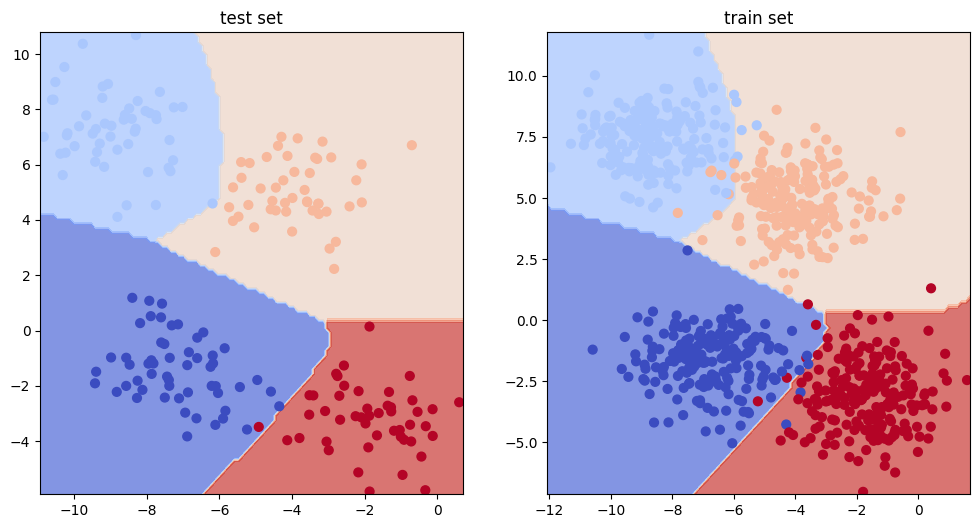

In [ ]:
# plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("test set")
plot_decision_boundary(model1, x_test, y_test)
plt.subplot(1, 2, 2)
plt.title("train set")
plot_decision_boundary(model1, x_train, y_train)

In [ ]:
!pip install torchmetrics==0.9.3
from torchmetrics import Accuracy

In [ ]:
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4)
torchmetrics_accuracy(y_predictions, y_test)

tensor(0.9950)

# Non-Linear Binary Classification for Complex Decision Boundaries

**Objective**: Develop a neural network to classify non-linearly separable data (simulated by make_moons), achieving `98% accuracy` and demonstrating the power of deep learning for complex decision boundaries

The **Key Highlights** of the project are:
1. Simulated moon-shaped clusters with `make_moons` (`noise=0.09`) to mimic real-world non-linear separability while balancing realism and challenge

2. The `Model Architecture` uses a `4-layer ReLU netowrk` to capture the curved decision boundaries with explicit layer definition without nn.Sequential for transparency and future customisation

``` 128 hidden layers may seem like overkill but would make sense for bigger data sets```

3. Used a loss function of `BCEWithLogitsLoss()` since there are only 2 moons, and Stochastic Gradient Descent `SGD()` optimiser with a learning rate `lr=0.01`

4. For the evaluation of the model, we use `torchmetric`'s `Accuracy` and a `decision boundary visualisation plot` to confirm non linear seperation

While the previous datasets approched non linear data with a much simpler dataset, this time we use a more complex shape that requires more curved boundaries unlike linearly seperable blobs that have little curvature

We use the `make_moons` dataset that has curvature in a more complex way than demonstrated previously

This example demonstrates a controlled complexity for prototyping. Real world data may require additional dimensionality.

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.09, random_state=99)
# more noise makes it less of a moon

# convert to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


In the graph you can visualise the training and the test split. for instance:
1. the `upper moon` has
  * the `red` dots representing the `train` data
  * the `pink` dots representing the `test` data

2. the `lower moon` has
  * the `blue` dots representing the `train` data
  * the `light green` dots representing the `test` data

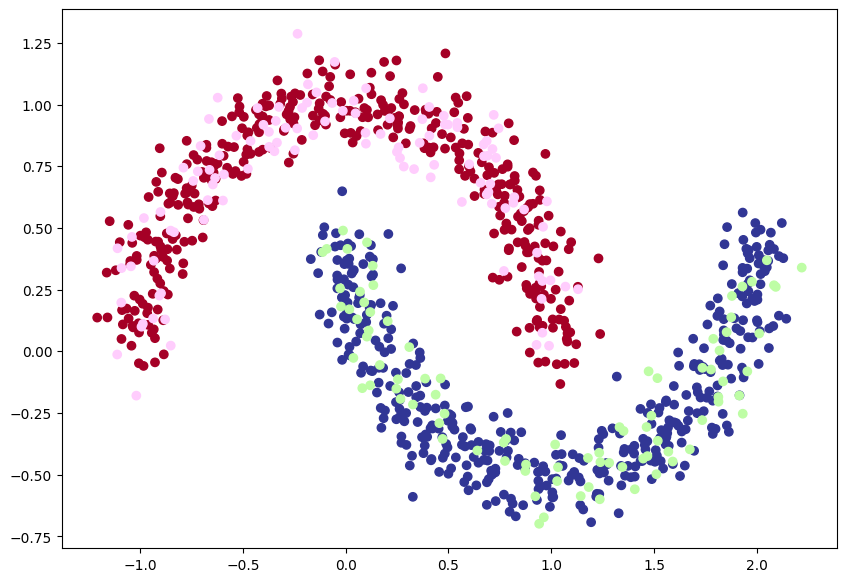

In [ ]:
# split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# plot for visualisation
plt.figure(figsize=(10, 7))
plt.scatter(x_train[:, 0], x_train[:, 1],
            c=y_train,  cmap=plt.cm.RdYlBu);
plt.scatter(x_test[:, 0], x_test[:, 1],
            c=y_test,  cmap=plt.cm.vanimo);

For the Model Architecture, we use a `4-layer ReLU network` architecture. The following modules are used
1. `ReLU()` used for non linearity that avoids vanishing boundaries

2. the `4 layers` with `ReLU` sandwiched in the middle allows for more complex patterns. In this example we use 128 hidden nodes, but 64 is enough

3. We do not use `Kernel SVM` or `random forest` because
  * `Kernel SVM` does not perform well with multi dimensional data - real world data
  * `Random Forest` is too complex for this dataset and would result in overfitting the data

In [ ]:
# create the model
# in this case, we need a non linear model with curves, so we need the ReLu from nn

class MoonBinaryClassifier(nn.Module):
  def __init__(self, input_dimensions, output_dimensions, nodes):
     super().__init__()

     # use classes instead of sequential
     self.layer1 = nn.Linear(in_features=input_dimensions, out_features=nodes)
     self.layer2 = nn.Linear(in_features=nodes, out_features=nodes)
     self.layer3 = nn.Linear(in_features=nodes, out_features=nodes)
     self.layer4 = nn.Linear(in_features=nodes, out_features=output_dimensions)

     self.relu = nn.ReLU()

  # forward pass
  def forward(self, x):
    return self.layer4(self.relu(self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))))



For the loss function we use `Binary Cross Entropy` for binary data and classification data type `BCEWithLogitsLoss()` that includes the `sigmoid` function followed with `BCE()`

For the optimiser we use `Stochastic Gradient Descent` `SGD()` with a learning rate lr=0.01. While `Adam` or `AdamW` would perform well, for a dataset as small as this it would result in overfitting

In [ ]:
# loss function and optimiser
model2 = MoonBinaryClassifier(input_dimensions=2, output_dimensions=1, nodes=128)

# loss function for non linear we can use a bce loss with sigmoid aka logits
lossFunctionMoon = nn.BCEWithLogitsLoss()
# for the optimiser we will use SGD since its easier to use
optimiserMoon = torch.optim.SGD(model2.parameters(), lr=0.01)

The `Training Loop` is similar to the previous projects. The loop is as follows:

1. put the model in train mode with `train()` and perform a `forward pass` and get the logits. Use the sigmoid function and round it to get the predictions aka the probabilty

2. calculate the `loss` with the loss function using the `logits` from the models result and the test real data

3. ensure there is no acculumualtion of the parameters with `zero_grad()` for the optimiser and perform a `backward propogation` on the loss function

4. Fine tune the parameters with `step()` for the optimiser

5. `Evaluate` the model in `eval()` mode with `Accuracy` from `torchmetrics` and the `loss` function for every epoch

In [ ]:
# training loop
test_accuracy, test_loss = [], []
epochs = 2000

for epoch in range(epochs):
  # model in training mode
  model2.train()

  # forward pass with sigmoid
  y_logits = model2(x_train).squeeze()
  y_prob = torch.sigmoid(y_logits)
  y_predictions = torch.round(y_prob)

  # loss function
  loss = lossFunctionMoon(y_logits, y_train)

  # optimiser zero grad
  optimiserMoon.zero_grad()

  # loss backward
  loss.backward()

  # optimiser step
  optimiserMoon.step()

  # evaluation
  model2.eval()
  with torch.inference_mode():
    test_logits = model2(x_test).squeeze()
    test_probs = torch.sigmoid(test_logits)
    test_preds = torch.round(test_probs)

    test_accuracy = Accuracy(task='binary', num_classes=1)
    accuracy = test_accuracy(test_preds, y_test.long())
    test_loss = lossFunctionMoon(test_logits, y_test)

  if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Test Loss: {test_loss:.5f}, Test Acc: {accuracy}%")




Epoch: 0 | Test Loss: 0.69367, Test Acc: 0.4350000023841858%
Epoch: 100 | Test Loss: 0.64995, Test Acc: 0.7549999952316284%
Epoch: 200 | Test Loss: 0.58127, Test Acc: 0.7950000166893005%
Epoch: 300 | Test Loss: 0.47504, Test Acc: 0.8550000190734863%
Epoch: 400 | Test Loss: 0.36486, Test Acc: 0.8600000143051147%
Epoch: 500 | Test Loss: 0.29317, Test Acc: 0.8700000047683716%
Epoch: 600 | Test Loss: 0.25157, Test Acc: 0.8799999952316284%
Epoch: 700 | Test Loss: 0.22373, Test Acc: 0.8999999761581421%
Epoch: 800 | Test Loss: 0.20227, Test Acc: 0.9150000214576721%
Epoch: 900 | Test Loss: 0.18432, Test Acc: 0.9300000071525574%
Epoch: 1000 | Test Loss: 0.16836, Test Acc: 0.9350000023841858%
Epoch: 1100 | Test Loss: 0.15361, Test Acc: 0.949999988079071%
Epoch: 1200 | Test Loss: 0.13959, Test Acc: 0.9549999833106995%
Epoch: 1300 | Test Loss: 0.12619, Test Acc: 0.9549999833106995%
Epoch: 1400 | Test Loss: 0.11337, Test Acc: 0.9549999833106995%
Epoch: 1500 | Test Loss: 0.10124, Test Acc: 0.9599999

Visualise the results with a `decision boundary plot` and see the accuracy with `Accuracy` from `torchmetrics`

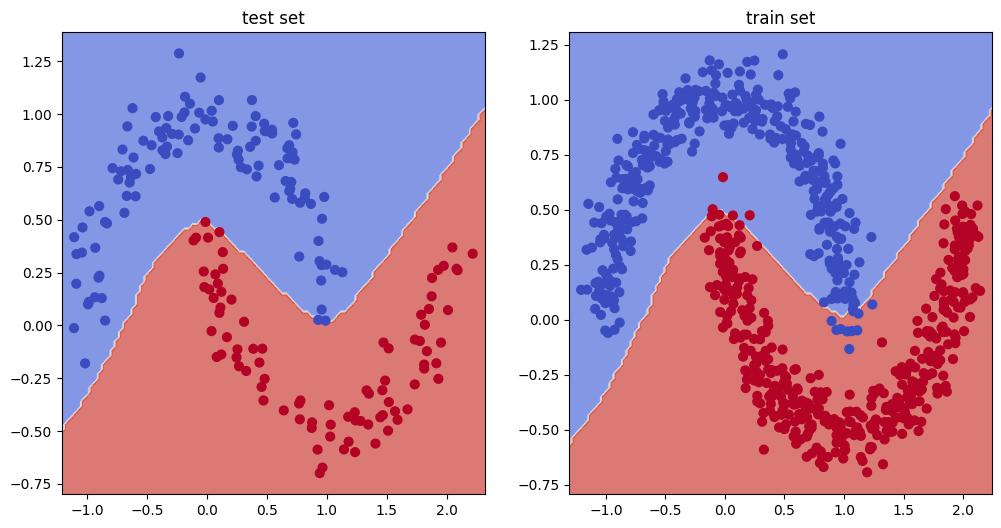

In [ ]:
# plot the results

model2.eval()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("test set")
plot_decision_boundary(model2, x_test, y_test)
plt.subplot(1, 2, 2)
plt.title("train set")
plot_decision_boundary(model2, x_train, y_train)

# Multi-Class Spiral Classification Using Deep Learning

**Objective**: Develop a neural network to classify 3 intertwined spiral clusters (non-linearly separable data), achieving `96.67% accuracy` and demonstrating the model's ability to capture complex decision boundaries

The **Key Highlights** of this project are:
1. Generated 3 spirals (N=100 points per class) with `Gaussian noise` (σ=0.2) to simulate real-world overlap and visualized using `plt.scatter` to confirm non-linear separability

2. The Model Architecture is a `3-layer ReLU network` (128 nodes/layer) with `nn.Sequential` for modularity. The loss is calculated with `CrossEntropyLoss()` for multi-class classification and `Stochastic Gradient Descent` `SGD()` for the optimiser with a learning rate of `lr-0.01`

3. Evaluated the model with `Accuracy` from `torchmetrics` with an accuracy of `96.67%` for test data

4. Plotted `decision boundary`**bold text** plots to confirm the model learned spiral (complex non linear) seperation

Spirals were chosen for this dataset to test the models ability to handle non-linear, overlapping multi class boundaries which is more commmon in real world data.

While this project demonstrates controlled complexity, real world examples would have higher dimensionalty

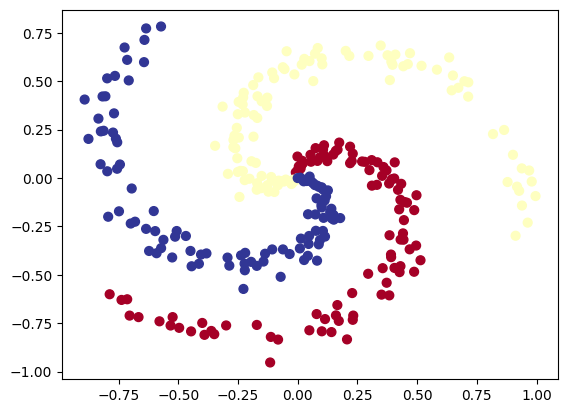

In [ ]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes

X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels

for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta

  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j


plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
# convert to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.long)

In [ ]:
# split to train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

For the Model Architecture we use a `Modular 3-layer ReLU network`. the modules are:
1. `nn.Sequential()` for a modular and clean approach.

2. `ReLU()` for non linearity and avoid vanishing gradients

```while for this dataset 64 would suffice, there was a doubt of underfitting, hence 128 was chosen```

In [ ]:
# making the model
class SpiralClassificationModel(nn.Module):
  def __init__(self, input_dimension, output_dimension, nodes):
     super().__init__()

     # do a sequential one cause i lazy
     self.layers = nn.Sequential(
         nn.Linear(in_features=input_dimension, out_features=nodes),
         nn.ReLU(),
         nn.Linear(in_features=nodes, out_features=nodes),
         nn.ReLU(),
         nn.Linear(in_features=nodes, out_features=nodes),
         nn.ReLU(),
         nn.Linear(in_features=nodes, out_features=output_dimension)
     )

  def forward(self, x):
    return self.layers(x)


For the loss ufnction we use `CrossEntropyLoss()` and for the optimiser we use `SGD()` with a learning rate of `lr=0.01`

In [ ]:
# creating the loss function and the optimiser

model3 = SpiralClassificationModel(2,3,128)

# loss function for multi classification can be cross entropy
lossFunctionSpiral = nn.CrossEntropyLoss()
optimiserSpiral = torch.optim.SGD(model3.parameters(), lr=0.01)

the `Training Loop` is similar to the ones above. The main highlights are:
1. putting the model in train mode with `train()` and perform a forward pass. take the `logits` and make them on a scale of [0,1] with `softmax` for probability

2. calculate the `loss` with the loss function and the logits and the train values

3. ensure that no accumulation of parameters are done with `zero_grad()` and perform a `backward propogation` with the loss

4. fine tune the parameters with `step()` on the optimiser

5. Evaluate the model by putting it in `eval()` mode and calculate the `loss` and `accuracy` with the accuracy function `accuracy_fn()` made previously and print it for every epoch

In [ ]:
# training loop
epochs = 10000

for epoch in range(epochs):
  # model in traning mode
  model3.train()

  # forward pass
  y_logits = model3(x_train)
  y_predictions = torch.softmax(y_logits, dim=1).argmax(1)

  # loss function
  loss = lossFunctionSpiral(y_logits, y_train)

  # optimiser zero grad
  optimiserSpiral.zero_grad()

  # loss backwards
  loss.backward()

  # optimiser step
  optimiserSpiral.step()

  # evaluation
  model3.eval()

  with torch.inference_mode():
    test_logits = model3(x_test)
    test_predictions = torch.softmax(test_logits, dim=1).argmax(1)

    test_accuracy = accuracy_fn(y_test, test_predictions)
    test_loss = lossFunctionSpiral(test_logits, y_test.long())

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Test Loss: {test_loss:.5f}, Test Acc: {test_accuracy:.2f}%")

Epoch: 0 | Test Loss: 1.09843, Test Acc: 38.33%
Epoch: 100 | Test Loss: 1.08429, Test Acc: 61.67%
Epoch: 200 | Test Loss: 1.06749, Test Acc: 50.00%
Epoch: 300 | Test Loss: 1.04391, Test Acc: 51.67%
Epoch: 400 | Test Loss: 1.01138, Test Acc: 46.67%
Epoch: 500 | Test Loss: 0.96987, Test Acc: 45.00%
Epoch: 600 | Test Loss: 0.92515, Test Acc: 51.67%
Epoch: 700 | Test Loss: 0.88365, Test Acc: 48.33%
Epoch: 800 | Test Loss: 0.84522, Test Acc: 51.67%
Epoch: 900 | Test Loss: 0.80990, Test Acc: 51.67%
Epoch: 1000 | Test Loss: 0.77811, Test Acc: 51.67%
Epoch: 1100 | Test Loss: 0.75028, Test Acc: 56.67%
Epoch: 1200 | Test Loss: 0.72635, Test Acc: 56.67%
Epoch: 1300 | Test Loss: 0.70496, Test Acc: 60.00%
Epoch: 1400 | Test Loss: 0.68541, Test Acc: 60.00%
Epoch: 1500 | Test Loss: 0.66655, Test Acc: 60.00%
Epoch: 1600 | Test Loss: 0.64800, Test Acc: 65.00%
Epoch: 1700 | Test Loss: 0.62907, Test Acc: 65.00%
Epoch: 1800 | Test Loss: 0.60989, Test Acc: 66.67%
Epoch: 1900 | Test Loss: 0.59031, Test Acc:

Visualise the results with a `decision boundary plot`

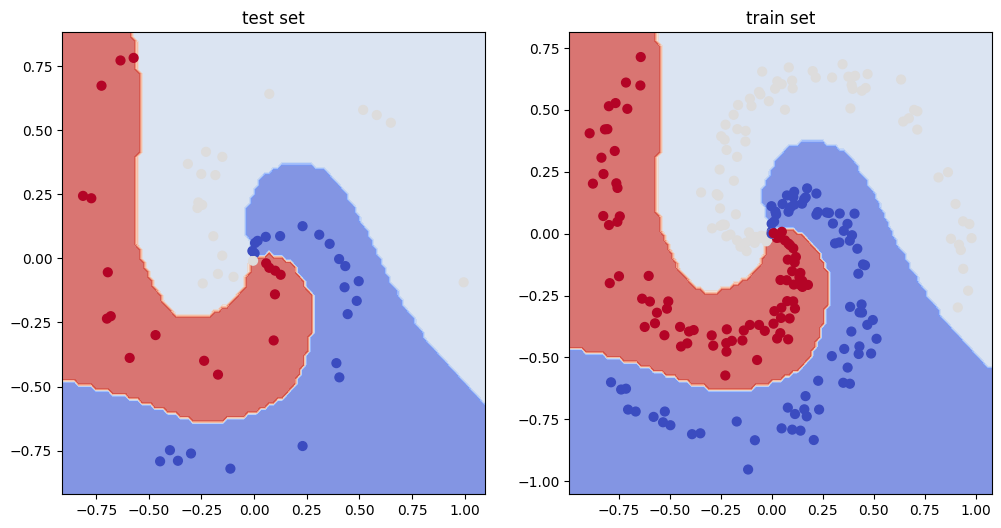

In [ ]:
# plot
model3.eval()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("test set")
plot_decision_boundary(model3, x_test, y_test)
plt.subplot(1, 2, 2)
plt.title("train set")
plot_decision_boundary(model3, x_train, y_train)
